In [31]:
import numpy as np 
import pandas as pd 

In [32]:
df = pd.read_csv('laptop_price_processed.csv')

In [33]:
from sklearn.preprocessing import LabelEncoder

categorical_col = ["Company", "TypeName", "OpSys", "Cpu_Brand", "Cpu_Series", "Gpu_Manufacturer", "Gpu_Series", "Memory_Type", "Product_Series"]

le = LabelEncoder()

for col in categorical_col:
  df[col] = le.fit_transform(df[col])

In [34]:
from sklearn.preprocessing import StandardScaler

numeric_col = ["Inches", "Ram", "Weight", "IPS_Panel", "Retina_Display", "Touchscreen", "Resolution_X", "Resolution_Y", "Clock_Speed", "Memory_Size(GB)", 'Total_Pixels']

sc = StandardScaler()

for col in numeric_col:
  df[col] = sc.fit_transform(df[[col]])

In [35]:
X = df.drop(columns=['laptop_ID', 'Price_euros'])
y = df['Price_euros']

In [36]:
# X = df.drop(columns=['laptop_ID', 'Price_euros', 'IPS_Panel', 'Retina_Display', 'Touchscreen', 'High_Resolution', 'TypeName', 'Memory_Size(GB)', 'Cpu_Brand', 'Cpu_Series', 'Product_Series', 'Company', 'Gpu_Series'])
# y = df['Price_euros']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [38]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [39]:
from sklearn.metrics import r2_score

y_pred = lr_model.predict(X_test)
print(f'Accuracy {r2_score(y_test, y_pred)}')

Accuracy 0.7731493626116954


Text(0.5, 1.0, 'Permutaion Importance for Linear Regression model')

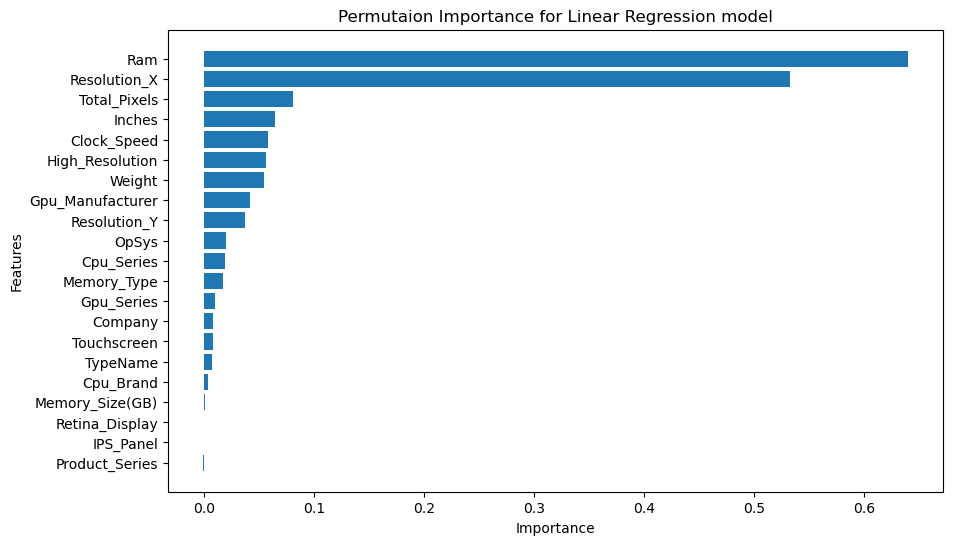

In [40]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(lr_model, X_test, y_test, scoring="r2")
importance_df = pd.DataFrame({
  'Feature' : X.columns,
  'Importance' : perm_importance.importances_mean
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Permutaion Importance for Linear Regression model')


In [41]:
from sklearn.ensemble import RandomForestRegressor

rfreg_model = RandomForestRegressor()
rfreg_model.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
y_pred = rfreg_model.predict(X_test)
from sklearn.metrics import r2_score
print(f'Accuracy {r2_score(y_test, y_pred)}')

Accuracy 0.8604250310210566


In [43]:
X_test

,Company,TypeName,Inches,Ram,OpSys,Weight,IPS_Panel,Retina_Display,Touchscreen,Resolution_X,...,Total_Pixels,High_Resolution,Product_Series,Cpu_Brand,Cpu_Series,Clock_Speed,Gpu_Manufacturer,Gpu_Series,Memory_Type,Memory_Size(GB)
277,0,3,0.408772,-0.075195,5,0.242426,1.603079,-0.114975,-0.415713,0.050997,...,-0.068457,0,56,1,11,-0.985431,3,1,2,0.842259
71,4,4,-1.204407,-0.075195,5,-0.960185,1.603079,-0.114975,-0.415713,0.050997,...,-0.068457,0,123,1,11,-0.985431,0,9,4,-0.759244
854,2,3,0.408772,-0.075195,5,0.392752,1.603079,-0.114975,-0.415713,0.050997,...,-0.068457,0,127,1,11,0.792712,3,1,4,-0.759244
827,4,3,-0.713439,-0.862176,5,-0.419010,-0.623799,-0.114975,-0.415713,-1.069437,...,-0.805114,0,134,1,9,-0.590288,2,2,2,-0.250433
1049,2,2,-2.396756,-0.862176,1,-1.260838,-0.623799,-0.114975,-0.415713,-1.069437,...,-0.805114,0,61,1,7,-1.380574,2,2,0,-1.259714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,4,4,-1.204407,-0.075195,5,-1.245805,1.603079,-0.114975,2.405506,3.934090,...,4.404498,1,222,1,10,-1.380574,2,10,4,-1.026162
126,7,3,-0.713439,-0.075195,5,-0.614435,-0.623799,-0.114975,-0.415713,0.050997,...,-0.068457,0,159,1,10,-1.380574,2,10,2,0.842259
324,0,3,0.408772,-0.075195,5,0.242426,-0.623799,-0.114975,-0.415713,-1.069437,...,-0.805114,0,56,0,1,0.792712,0,9,4,-0.759244
196,14,1,1.601121,4.646692,5,2.181636,-0.623799,-0.114975,2.405506,3.934090,...,4.404498,1,58,1,11,1.187854,3,1,4,0.842259


In [44]:
y_test

277      745.0
71       955.0
854      787.0
827      585.0
1049     287.9
         ...  
565     1599.0
126      812.0
324      659.0
196     6099.0
698     1877.0
Name: Price_euros, Length: 261, dtype: float64

Text(0.5, 1.0, 'Permutaion Importance for RandomForest Regression model')

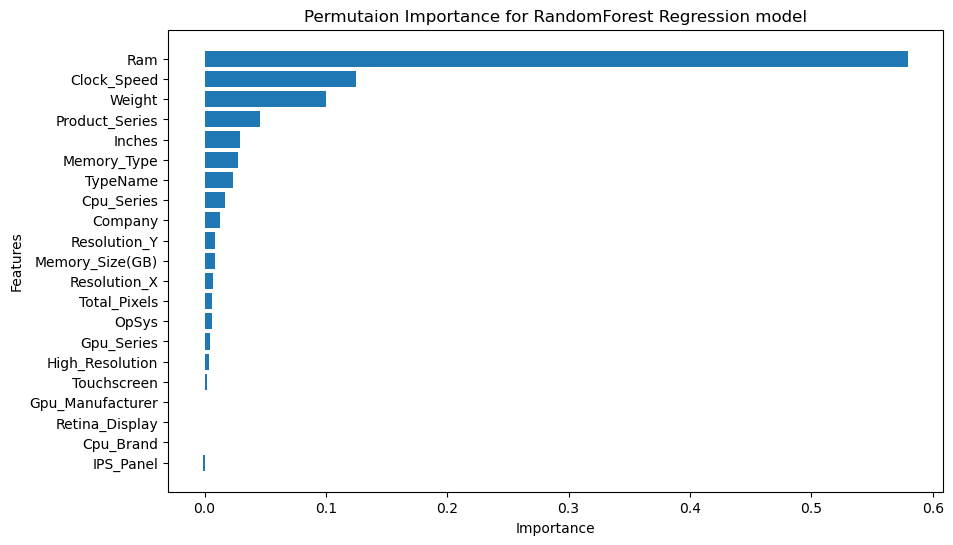

In [45]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rfreg_model, X_test, y_test, scoring="r2")
importance_df = pd.DataFrame({
  'Feature' : X.columns,
  'Importance' : perm_importance.importances_mean
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Permutaion Importance for RandomForest Regression model')